# Dodatkowy, wybrany eksperyment oceniający użyteczność jednej z następujących technik regularyzacji uczenia:
**Dropout**, Batch Normalization, Augmentacja danych

In [7]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

In [8]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [9]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "dropout_rate"
for dropout_rate in [0, 0.1, 0.5, 0.8, 0.9, 0.95]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=8, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dropout(rate=dropout_rate),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
    all_titles.append(dropout_rate)
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D       8      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3       Flatten                                                       
 5  4       Dropout                                                       
 6  5         Dense                                                     10,
 0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D       8      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3       Flatten                                                       
 5  4       Dropout                                                       
 6  5         Dense     

In [10]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [11]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 1/5
469/469 [==============================] - 11s 22ms/step - loss: 0.3007 - accuracy: 0.9160 - val_loss: 0.1553 - val_accuracy: 0.9568
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.1294 - accuracy: 0.9630 - val_loss: 0.0981 - val_accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 16s 33ms/step - loss: 0.0941 - accuracy: 0.9732 - val_loss: 0.0789 - val_accuracy: 0.9743
Epoch 4/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0773 - accuracy: 0.9772 - val_loss: 0.0725 - val_accuracy: 0.9767
Epoch 5/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0665 - accuracy: 0.9811 - val_loss: 0.0692 - val_accuracy: 0.9794


 17%|█▋        | 1/6 [01:23<06:55, 83.00s/it]

Epoch 1/5
469/469 [==============================] - 23s 46ms/step - loss: 0.2996 - accuracy: 0.9179 - val_loss: 0.1423 - val_accuracy: 0.9609
Epoch 2/5
469/469 [==============================] - 23s 49ms/step - loss: 0.1271 - accuracy: 0.9641 - val_loss: 0.0930 - val_accuracy: 0.9717
Epoch 3/5
469/469 [==============================] - 22s 48ms/step - loss: 0.0938 - accuracy: 0.9727 - val_loss: 0.0798 - val_accuracy: 0.9752
Epoch 4/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0783 - accuracy: 0.9774 - val_loss: 0.0735 - val_accuracy: 0.9775
Epoch 5/5
469/469 [==============================] - 21s 46ms/step - loss: 0.0692 - accuracy: 0.9797 - val_loss: 0.0691 - val_accuracy: 0.9776


 33%|███▎      | 2/6 [03:15<06:40, 100.12s/it]

Epoch 1/5
469/469 [==============================] - 23s 46ms/step - loss: 0.3422 - accuracy: 0.9010 - val_loss: 0.1558 - val_accuracy: 0.9586
Epoch 2/5
469/469 [==============================] - 22s 47ms/step - loss: 0.1580 - accuracy: 0.9535 - val_loss: 0.0995 - val_accuracy: 0.9711
Epoch 3/5
469/469 [==============================] - 22s 47ms/step - loss: 0.1205 - accuracy: 0.9647 - val_loss: 0.0830 - val_accuracy: 0.9758
Epoch 4/5
469/469 [==============================] - 19s 41ms/step - loss: 0.1023 - accuracy: 0.9697 - val_loss: 0.0739 - val_accuracy: 0.9767
Epoch 5/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0919 - accuracy: 0.9723 - val_loss: 0.0671 - val_accuracy: 0.9790


 50%|█████     | 3/6 [05:00<05:07, 102.57s/it]

Epoch 1/5
469/469 [==============================] - 21s 42ms/step - loss: 0.4561 - accuracy: 0.8654 - val_loss: 0.1924 - val_accuracy: 0.9472
Epoch 2/5
469/469 [==============================] - 20s 42ms/step - loss: 0.2413 - accuracy: 0.9279 - val_loss: 0.1423 - val_accuracy: 0.9605
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.1989 - accuracy: 0.9399 - val_loss: 0.1169 - val_accuracy: 0.9674
Epoch 4/5
469/469 [==============================] - 19s 40ms/step - loss: 0.1794 - accuracy: 0.9466 - val_loss: 0.1092 - val_accuracy: 0.9677
Epoch 5/5
469/469 [==============================] - 19s 41ms/step - loss: 0.1673 - accuracy: 0.9497 - val_loss: 0.0962 - val_accuracy: 0.9720


 67%|██████▋   | 4/6 [07:23<03:57, 118.68s/it]

Epoch 1/5
469/469 [==============================] - 18s 36ms/step - loss: 0.5792 - accuracy: 0.8171 - val_loss: 0.2381 - val_accuracy: 0.9373
Epoch 2/5
469/469 [==============================] - 17s 36ms/step - loss: 0.3430 - accuracy: 0.8947 - val_loss: 0.1814 - val_accuracy: 0.9505
Epoch 3/5
469/469 [==============================] - 16s 34ms/step - loss: 0.2952 - accuracy: 0.9109 - val_loss: 0.1552 - val_accuracy: 0.9561
Epoch 4/5
469/469 [==============================] - 16s 35ms/step - loss: 0.2753 - accuracy: 0.9171 - val_loss: 0.1428 - val_accuracy: 0.9599
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2523 - accuracy: 0.9244 - val_loss: 0.1322 - val_accuracy: 0.9628


 83%|████████▎ | 5/6 [08:44<01:45, 105.08s/it]

Epoch 1/5
469/469 [==============================] - 13s 25ms/step - loss: 0.8638 - accuracy: 0.7156 - val_loss: 0.3418 - val_accuracy: 0.9071
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.5581 - accuracy: 0.8269 - val_loss: 0.2714 - val_accuracy: 0.9299
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.4991 - accuracy: 0.8465 - val_loss: 0.2360 - val_accuracy: 0.9395
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.4701 - accuracy: 0.8577 - val_loss: 0.2159 - val_accuracy: 0.9446
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.4399 - accuracy: 0.8674 - val_loss: 0.1977 - val_accuracy: 0.9482


100%|██████████| 6/6 [09:39<00:00, 96.54s/it] 


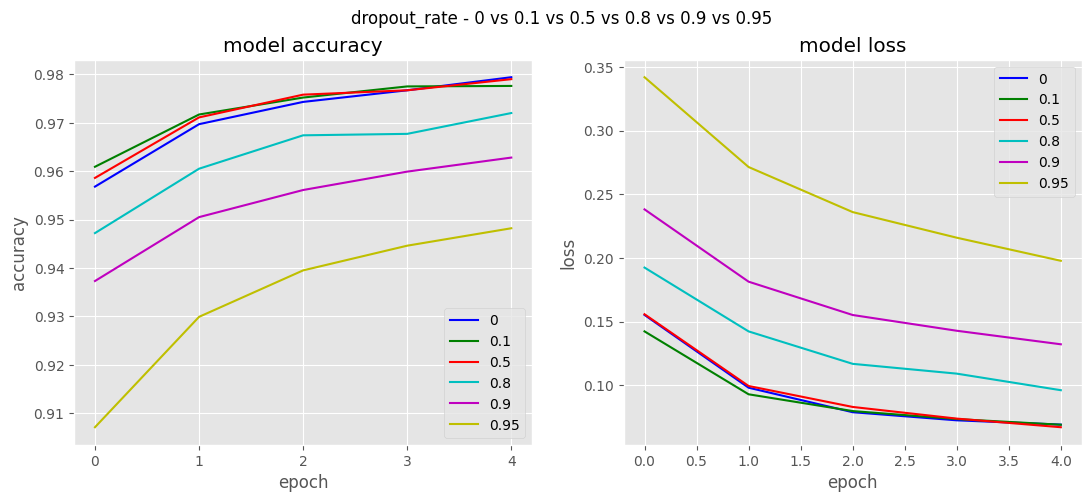

In [12]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)